In [2]:
class PolyNode:
    def __init__(self, coeff=0, power=0, nxt=None):
        self.coeff = coeff
        self.power = power
        self.next = nxt
    def __str__(self):
        return str(self.coeff) + 'x^' + str(self.power)

class PolyLL:
    def __init__(self, expression=[]):
        self.head = None
        for element in expression:
            if self.head == None:
                self.head = PolyNode(element[0], element[1])#element[0] 係數 element[1] 指數
            else:
                temp = self.head
                while temp.next != None:
                    temp = temp.next
                if temp.next == None:
                    temp.next = PolyNode(element[0], element[1]) #放到最後的節點

    def show_poly(self):
        temp = self.head
        while temp.next != None:
            print(temp, end = ' + ')
            temp = temp.next
            if temp.next == None:
                print(temp, end=' = 0\n')#最後項次不要加上＋

    def add(self, poly2):
        result = PolyLL()
        result.head = PolyNode()
        ptr = result.head#c(x)
        ptr1 = self.head#a(x)
        ptr2 = poly2.head#b(x)
        while ptr1 or ptr2:#ptr1 or ptr2 有內容時
            if not ptr2: #ptr2是空的 將ptr1放到ptr
                ptr.next = PolyNode(ptr1.coeff, ptr1.power)#將ptr1放到ptr
                ptr1 = ptr1.next
                ptr = ptr.next
            elif not ptr1:#ptr1是空的 將ptr2放到ptr
                ptr.next = PolyNode(ptr2.coeff, ptr2.power)#將ptr2放到ptr
                ptr2 = ptr2.next
                ptr = ptr.next
            elif ptr1.power > ptr2.power:#ptr1大於ptr2 將ptr1放到ptr
                ptr.next = PolyNode(ptr1.coeff, ptr1.power)#ptr1放到ptr
                ptr1 = ptr1.next #將ptr1往下一筆
                ptr = ptr.next #將ptr往下一筆
            elif ptr1.power < ptr2.power:#ptr2大於ptr1 將ptr2放到ptr
                ptr.next = PolyNode(ptr2.coeff, ptr2.power)#將ptr2放到ptr
                ptr2 = ptr2.next
                ptr = ptr.next
            else:
                coef = ptr1.coeff + ptr2.coeff #否則相加
                if coef:
                    ptr.next = PolyNode(coef, ptr1.power)
                    ptr = ptr.next
                ptr1 = ptr1.next #下一筆
                ptr2 = ptr2.next #下一筆
        result.head = result.head.next#最後將算好的結果 第一筆資料放到開頭
        #因為一開始放的是PolyNode 不是真實結果
        return result

    def sub(self, poly2):
        result = PolyLL()
        result.head = PolyNode()
        ptr = result.head
        ptr1 = self.head
        ptr2 = poly2.head
        while ptr1 or ptr2:
            if not ptr2:
                ptr.next = PolyNode(ptr1.coeff, ptr1.power)
                ptr1 = ptr1.next
                ptr = ptr.next
            elif not ptr1:
                ptr.next = PolyNode(-ptr2.coeff, ptr2.power)
                ptr2 = ptr2.next
                ptr = ptr.next
            elif ptr1.power > ptr2.power:
                ptr.next = PolyNode(ptr1.coeff, ptr1.power)
                ptr1 = ptr1.next
                ptr = ptr.next
            elif ptr1.power < ptr2.power:
                ptr.next = PolyNode(-ptr2.coeff, ptr2.power)
                ptr2 = ptr2.next
                ptr = ptr.next
            else:
                coef = ptr1.coeff - ptr2.coeff
                if coef:
                    ptr.next = PolyNode(coef, ptr1.power)
                    ptr = ptr.next
                ptr1 = ptr1.next
                ptr2 = ptr2.next
        result.head = result.head.next
        return result
#[2,100] 2^100
poly1 = PolyLL([[2,100], [-3,50], [1,0]])
poly2 = PolyLL([[2,50], [-5,1]])
poly3 = poly1.add(poly2)
poly4 = poly1.sub(poly2)
poly1.show_poly()
poly2.show_poly()
poly3.show_poly()
poly4.show_poly()



2x^100 + -3x^50 + 1x^0 = 0
2x^50 + -5x^1 = 0
2x^100 + -1x^50 + -5x^1 + 1x^0 = 0
2x^100 + -5x^50 + 5x^1 + 1x^0 = 0


In [3]:
fruits=[]
fruits.append("Apple")
fruits.append("Banana")
fruits.append("Cherry")
print(fruits.pop())
print(fruits.pop())
print(fruits.pop())
print(fruits)

Cherry
Banana
Apple
[]


In [4]:
class Stack():
    def __init__(self):
        self.my_stack = []

    def my_push(self, data):
        self.my_stack.append(data)

    def my_pop(self):
        return self.my_stack.pop()

    def size(self):
        return len(self.my_stack)

stack = Stack()
fruits = ['Apple', 'Banana', 'Cherry', 'Mango']
for fruit in fruits:
    stack.my_push(fruit)
    print('將 %s 水果堆入堆疊' % fruit)

print('堆疊有 %d 種水果' % stack.size())

將 Apple 水果堆入堆疊
將 Banana 水果堆入堆疊
將 Cherry 水果堆入堆疊
將 Mango 水果堆入堆疊
堆疊有 4 種水果


In [5]:
class Stack():
    def __init__(self, capacity):
        self.my_stack = [None]*capacity
        self.top = -1
        self.capacity = capacity
    def push(self, data):
        if self.isFull():
            print('堆疊已滿!')
        else:
            self.top+=1
            self.my_stack[self.top]=data
    def pop(self):
        if self.isEmpty():
            print('堆疊為空!')
            return None
        else:
            data = self.my_stack[self.top]
            self.my_stack[self.top] = None
            self.top-=1
            return data
    def size(self):
        return self.top+1
    def isEmpty(self):
        if(self.top==-1):
            return True
        else:
            return False
    def isFull(self):
        if(self.top>=self.capacity-1):
            return True
        else:
            return False

stack = Stack(3)
fruits = ['Apple', 'Banana', 'Cherry', 'Mango']
for fruit in fruits:
    print('將 %s 堆入堆疊' %fruit)
    stack.push(fruit)
print('堆疊有 %d 種水果' % stack.size())

for i in range(4):
    item = stack.pop()
    if (item):
        print('堆疊中取出%s' %item)
print('堆疊有 %d 種水果' % stack.size())


將 Apple 堆入堆疊
將 Banana 堆入堆疊
將 Cherry 堆入堆疊
將 Mango 堆入堆疊
堆疊已滿!
堆疊有 3 種水果
堆疊中取出Cherry
堆疊中取出Banana
堆疊中取出Apple
堆疊為空!
堆疊有 0 種水果


In [6]:
class Node:                                     #堆疊鏈結節點的宣告
    def __init__(self, data):
        self.data=data                          #堆疊資料的宣告
        self.next=None                          #堆疊中用來指向下一個節點

class StackLL:
    def __init__(self):
        self.top=None
    def isEmpty(self):
        if(self.top==None):
            return True
        else:
            return False
    def push(self, item):  
        newNode = Node(item)
        newNode.next = self.top                 #將新節點指向堆疊的頂端
        self.top = newNode                      #新節點成為堆疊的頂端
    def pop(self):
        if self.isEmpty():
            print('堆疊為空!')
            return None
        else:
            ptr = self.top                      #指向堆疊的頂端
            self.top = self.top.next            #將堆疊頂端的指標指向下一個節點
            return ptr.data                     #將從堆疊取出的資料回傳給主程式
    def size(self):
        ptr = self.top
        count=0
        while ptr:
            ptr=ptr.next
            count+=1
        return count

stack = StackLL()
fruits = ['Apple', 'Banana', 'Cherry', 'Mango']
for fruit in fruits:
    stack.push(fruit)
    print('將 %s 水果堆入堆疊' % fruit)

print('堆疊有 %d 種水果' % stack.size())
while not stack.isEmpty():
    print(stack.pop())


將 Apple 水果堆入堆疊
將 Banana 水果堆入堆疊
將 Cherry 水果堆入堆疊
將 Mango 水果堆入堆疊
堆疊有 4 種水果
Mango
Cherry
Banana
Apple


## 作業
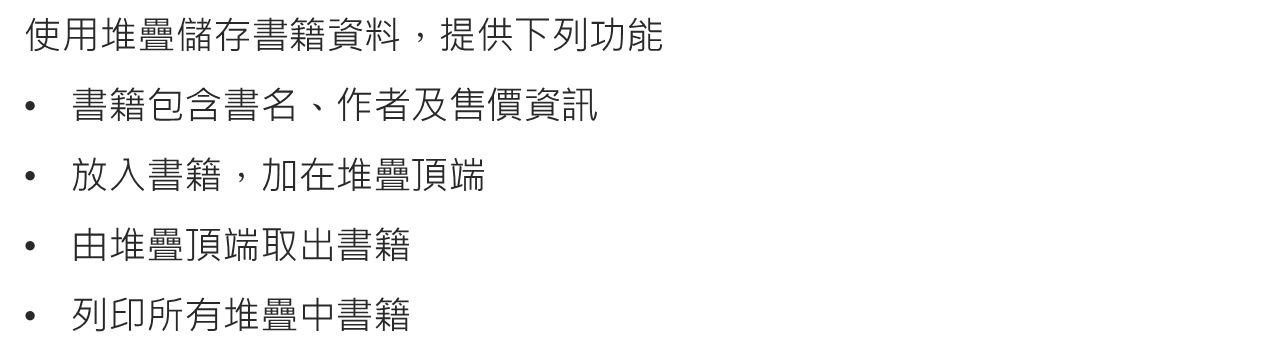

In [ ]:
class Book:
    def __init__(self, title, author, price):
        self.title = title
        self.author = author
        self.price = price
    def __str__(self):
        return "%s(%s)" %(self.title, self.author)
    
class BookStack:
    def __init__(self, capacity):
        self.my_stack = [None]*capacity
        self.top = -1
        self.capacity = capacity

#將其他功能實作





    
bookStack = BookStack(3)
books = [Book('鹿鼎記','金庸',500),
         Book('灌籃高手','井上雄彥',750),
         Book('哈利波特','JK 羅琳',800),
         Book('西遊記','吳承恩',450)]

for b in books:
    bookStack.push(b)
    bookStack.printStack()

for i in range(4):
    book = bookStack.pop()
    if book:
        print('取出:', book)
    bookStack.printStack()


In [8]:
class Queue():
    ''' Queue佇列 '''
    def __init__(self, capacity):
        self.queue = []
        self.capacity = capacity        
    def isEmpty(self):
        ''' 佇列是否為空 '''
        return len(self.queue)==0
    def isFull(self):
        ''' 佇列是否已滿 '''
        return len(self.queue)==self.capacity
    def enqueue(self, data):
        ''' data加入佇列 '''
        if(self.isFull()):
            print("佇列已滿!")
            return 
        self.queue.append(data)
    def dequeue(self):
        ''' 佇列取出data '''
        if(self.isEmpty()):
            print("佇列為空!")
            return None
        return self.queue.pop(0)    
    def size(self):
        ''' 回傳佇列長度 '''
        return len(self.queue)

queue = Queue(3)
people = ['Amy', 'David', 'Sean', 'Nicole']
for person in people:
    print('將 %s 排入佇列' %person)
    queue.enqueue(person)
print('佇列中有%d個人' %queue.size())

for i in range(4):
    item = queue.dequeue()
    if(item):
        print('佇列中取出%s' %item)
print('佇列中有%d個人' %queue.size())


將 Amy 排入佇列
將 David 排入佇列
將 Sean 排入佇列
將 Nicole 排入佇列
佇列已滿!
佇列中有3個人
佇列中取出Amy
佇列中取出David
佇列中取出Sean
佇列為空!
佇列中有0個人


In [9]:
from queue import Queue

q = Queue(3)
people = ['Amy', 'David', 'Sean', 'Nicole']
for person in people:
    if q.full():
        print('佇列已滿')
    else:   
        q.put(person)
        print('將 %s 排入佇列' %person)   
print('佇列中有%d個人' %q.qsize())
print(q.queue)

for i in range(4):
    if q.empty():
        print('佇列為空')
    else:   
        print(q.get())
print('佇列中有%d個人' %q.qsize())
print(q.queue)


將 Amy 排入佇列
將 David 排入佇列
將 Sean 排入佇列
佇列已滿
佇列中有3個人
deque(['Amy', 'David', 'Sean'])
Amy
David
Sean
佇列為空
佇列中有0個人
deque([])


In [10]:
class Node:
    def __init__(self, data):
        self.data=data
        self.next=None
    def __str__(self):
        if(self.next==None):
            return "{0}(None)".format(self.data)
        else:
            return "{0}({1})".format(self.data, self.next.data)
        
class Queue():
    def __init__(self):
        self.front = None
        self.rear = None
    def isEmpty(self):
        return self.front==None
    def enqueue(self, data):
        newNode = Node(data)        
        if self.isEmpty():
            self.front = self.rear = newNode
        else:
            self.rear.next = newNode
            self.rear = newNode
    def dequeue(self):
        if(self.isEmpty()):
            print("佇列為空!")
            return None
        else:
            item = self.front
            self.front = item.next
            if(self.front==None):
                self.rear = None
            return item
    def size(self):
        if(self.isEmpty()):
            return 0
        count=1
        ptr = self.front
        while ptr!=self.rear:
            ptr=ptr.next
            count+=1
        return count
    def print_list(self):   
        ptr = self.front
        while ptr:
            print(ptr, end='-')
            ptr = ptr.next
        print()

queue = Queue()
people = ['Amy', 'David', 'Sean', 'Nicole']
for person in people:
    queue.enqueue(person)
    print('將 %s 排入佇列' %person)
    #queue.print_list()
print('佇列中有%d個人' %queue.size())
for i in range(4):
    item = queue.dequeue()
    if(item):
        print('佇列中取出%s' %item.data)
        #queue.print_list()
print('佇列中有%d個人' %queue.size())


將 Amy 排入佇列
將 David 排入佇列
將 Sean 排入佇列
將 Nicole 排入佇列
佇列中有4個人
佇列中取出Amy
佇列中取出David
佇列中取出Sean
佇列中取出Nicole
佇列中有0個人


## 作業
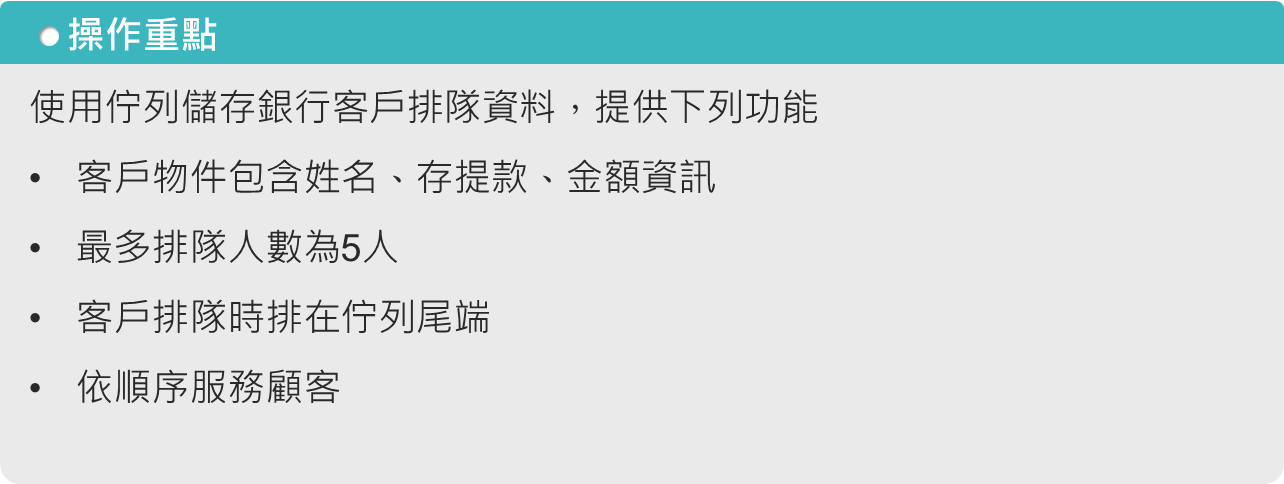

In [ ]:
class Customer:
    def __init__(self, name, trxType, amount):
        self.name = name
        self.trxType = trxType
        self.amount = amount
    def __str__(self):
        return '{0}{1}{2}元'.format(self.name,self.trxType,self.amount)

class ServQueue:
    #實作內容


customers = [Customer('Sean','存款',1000),
             Customer('David','提款',2000),
             Customer('Amy','存款',3000),
             Customer('Ed','存款',4000),
             Customer('Nicole','提款',5000),
             Customer('Douglas','存款',4000),
             Customer('Elizabeth','提款',6000)]
for cus in customers:
    servQueue.enqueue(cus)

for i in range(servQueue.size()):    
    print(servQueue.dequeue())

In [11]:
class MyDeque:
    def __init__(self, capacity):
        self.queue = []
        self.capacity = capacity        
    def isEmpty(self):
        return len(self.queue)==0
    def isFull(self):
        return len(self.queue)==self.capacity
    def addFront(self, data):
        if(self.isFull()):
            print("佇列已滿!")
            return 
        self.queue.insert(0, data)
    def addRear(self, data):
        if(self.isFull()):
            print("佇列已滿!")
            return 
        self.queue.append(data)
    def delFront(self):
        if(self.isEmpty()):
            print("佇列為空!")
            return None
        return self.queue.pop(0)
    def delRear(self):
        if(self.isEmpty()):
            print("佇列為空!")
            return None
        return self.queue.pop() 
    def size(self):
        return len(self.queue)
    def __str__(self):
        return str(self.queue)

deq = MyDeque(4)

s = 64
for i in range(6):
    s+=1
    print('加入', chr(s))
    if(i%2==0):
        deq.addFront(chr(s))
    else:
        deq.addRear(chr(s))
    print(deq)

for j in range(6):
    if(j%2==0):
        item = deq.delFront()
    else:
        item = deq.delRear()
    if(item):
        print("取出:", item)
    print(deq)


加入 A
['A']
加入 B
['A', 'B']
加入 C
['C', 'A', 'B']
加入 D
['C', 'A', 'B', 'D']
加入 E
佇列已滿!
['C', 'A', 'B', 'D']
加入 F
佇列已滿!
['C', 'A', 'B', 'D']
取出: C
['A', 'B', 'D']
取出: D
['A', 'B']
取出: A
['B']
取出: B
[]
佇列為空!
[]
佇列為空!
[]


In [12]:
count = 0
for i in range (1,5):
    for j in range(1,5):
        for k in range(1,5):
            for l in range(1,5):
                if (i != j and i!=k and i!=l and j !=k and j != l and k!=l):
                    print(f"{i}{j}{k}{l}")


1234
1243
1324
1342
1423
1432
2134
2143
2314
2341
2413
2431
3124
3142
3214
3241
3412
3421
4123
4132
4213
4231
4312
4321


In [13]:
count = 0
for i in range (1,5):
    for j in range(1,5):
        if i == j:
            continue
        for k in range(1,5):
            if k==j or  k==i:
                continue
            for l in range(1,5):
                if l==i or l==j or l == k:
                    continue
                print(f"{i}{j}{k}{l}")



1234
1243
1324
1342
1423
1432
2134
2143
2314
2341
2413
2431
3124
3142
3214
3241
3412
3421
4123
4132
4213
4231
4312
4321


In [14]:
c = 65
for i in range (0,5):
    for j in range(0,5):
        if i == j:
            continue
        for k in range(0,5):
            if i == k or j == k:
                continue
            for l in range(0,5):
              if l == k or l == j or l == i:
                 continue
              for m in range(0,5):
                   if m == k or m == j or m == i or m == l:
                         continue
                   print(f"[{chr(c+i)},{chr(c+j)},{chr(c+k)},{chr(c+l)},{chr(c+m)}]")


[A,B,C,D,E]
[A,B,C,E,D]
[A,B,D,C,E]
[A,B,D,E,C]
[A,B,E,C,D]
[A,B,E,D,C]
[A,C,B,D,E]
[A,C,B,E,D]
[A,C,D,B,E]
[A,C,D,E,B]
[A,C,E,B,D]
[A,C,E,D,B]
[A,D,B,C,E]
[A,D,B,E,C]
[A,D,C,B,E]
[A,D,C,E,B]
[A,D,E,B,C]
[A,D,E,C,B]
[A,E,B,C,D]
[A,E,B,D,C]
[A,E,C,B,D]
[A,E,C,D,B]
[A,E,D,B,C]
[A,E,D,C,B]
[B,A,C,D,E]
[B,A,C,E,D]
[B,A,D,C,E]
[B,A,D,E,C]
[B,A,E,C,D]
[B,A,E,D,C]
[B,C,A,D,E]
[B,C,A,E,D]
[B,C,D,A,E]
[B,C,D,E,A]
[B,C,E,A,D]
[B,C,E,D,A]
[B,D,A,C,E]
[B,D,A,E,C]
[B,D,C,A,E]
[B,D,C,E,A]
[B,D,E,A,C]
[B,D,E,C,A]
[B,E,A,C,D]
[B,E,A,D,C]
[B,E,C,A,D]
[B,E,C,D,A]
[B,E,D,A,C]
[B,E,D,C,A]
[C,A,B,D,E]
[C,A,B,E,D]
[C,A,D,B,E]
[C,A,D,E,B]
[C,A,E,B,D]
[C,A,E,D,B]
[C,B,A,D,E]
[C,B,A,E,D]
[C,B,D,A,E]
[C,B,D,E,A]
[C,B,E,A,D]
[C,B,E,D,A]
[C,D,A,B,E]
[C,D,A,E,B]
[C,D,B,A,E]
[C,D,B,E,A]
[C,D,E,A,B]
[C,D,E,B,A]
[C,E,A,B,D]
[C,E,A,D,B]
[C,E,B,A,D]
[C,E,B,D,A]
[C,E,D,A,B]
[C,E,D,B,A]
[D,A,B,C,E]
[D,A,B,E,C]
[D,A,C,B,E]
[D,A,C,E,B]
[D,A,E,B,C]
[D,A,E,C,B]
[D,B,A,C,E]
[D,B,A,E,C]
[D,B,C,A,E]
[D,B,C,E,A]
[D,B,E,A,C]
[D,B

In [15]:
'''
permutations 套件練習 排列
'''
from itertools import permutations
perm = permutations([1,2,3,4])
for i in list(perm):
    print(i)

(1, 2, 3, 4)
(1, 2, 4, 3)
(1, 3, 2, 4)
(1, 3, 4, 2)
(1, 4, 2, 3)
(1, 4, 3, 2)
(2, 1, 3, 4)
(2, 1, 4, 3)
(2, 3, 1, 4)
(2, 3, 4, 1)
(2, 4, 1, 3)
(2, 4, 3, 1)
(3, 1, 2, 4)
(3, 1, 4, 2)
(3, 2, 1, 4)
(3, 2, 4, 1)
(3, 4, 1, 2)
(3, 4, 2, 1)
(4, 1, 2, 3)
(4, 1, 3, 2)
(4, 2, 1, 3)
(4, 2, 3, 1)
(4, 3, 1, 2)
(4, 3, 2, 1)


In [16]:
'''
Combinations 組合
'''
from itertools import combinations
comb = combinations([1,2,3,4,5,6],3)
for i in list(comb):
    print(i)

(1, 2, 3)
(1, 2, 4)
(1, 2, 5)
(1, 2, 6)
(1, 3, 4)
(1, 3, 5)
(1, 3, 6)
(1, 4, 5)
(1, 4, 6)
(1, 5, 6)
(2, 3, 4)
(2, 3, 5)
(2, 3, 6)
(2, 4, 5)
(2, 4, 6)
(2, 5, 6)
(3, 4, 5)
(3, 4, 6)
(3, 5, 6)
(4, 5, 6)


In [17]:
'''
程式範例：質數驗證
'''
#檢查是否為質數
def is_prime(number):
    for i in range(2,number):
        if number % i == 0:
            return False
    return True
n = int(input("輸入一個正整數"))
if is_prime(n):
    print(f"{n}是質數")
else:
    print(f"{n}不是質數")

primeNums=[]
#顯示小於等於n的質數
for j in range(2 , n + 1):
    if is_prime(j):
        primeNums.append(j);       
print(f"小於等於{n}的質數:",primeNums)        


輸入一個正整數37
37是質數
小於等於37的質數: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37]


In [18]:
'''
程式範例：質數驗證
'''
#檢查是否為質數
def is_prime(number):
    for i in range(2,number):
        if number % i == 0:
            return False
    return True
n = int(input("輸入一個正整數"))
if is_prime(n):
    print(f"{n}是質數")
else:
    print(f"{n}不是質數")

primeNums=[]
#顯示小於等於n的質數
for j in range(2 , n + 1):
    if is_prime(j):
        primeNums.append(j);       
print(f"小於等於{n}的質數:",primeNums)        


輸入一個正整數37
37是質數
小於等於37的質數: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37]


In [1]:
'''
質因數分解
引用埃拉斯托特尼篩法，檢查範圍改為2到√ x 
'''
from math import sqrt
while True:
    n= int(input("輸入一個整數:"))
    if n== -1:
        break
    print(f"{n}=",end='')
    while True:
        for i in range(2,int(sqrt(n)) + 1):
            if n %i == 0:
                n = int(n /i)
                print(f"{i}*",end='')    
                break
        else:
            print(n)
            break    


輸入一個整數:26
26=2*13
輸入一個整數:26
26=2*13
輸入一個整數:-1


In [2]:
def square_root1(x):
    i = 1
    while i*i < x:
        i +=1
        if i*i == x:
            return i
    return i - 1    
    
def square_root2(x,pre=2):
    step = 1
    r = step
    while step >= 10**-pre:                
         while(r*r < x):
             r+=step 
             if(r*r == x):
                 return r
         r -= step
         step/=10
    return r           
num = int(input('輸入整數'))   
print(f'{num}的平方根{square_root1(num)}')
print(f'{num}的平方根{square_root2(num):.2f}')


輸入整數7
7的平方根2
7的平方根2.64
